## Задание 1

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs

Исходные данные:

Реалзуем кластеризацию с помощью k-means:

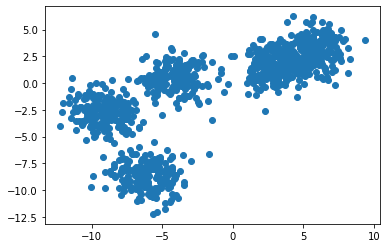

In [199]:
X, Y = make_blobs(n_samples = 1000, n_features=2, centers=5, cluster_std = 1.2, random_state=17)
plt.scatter(X[:,0], X[:,1])

In [200]:
def distEclud(vecA, vecB):
    return np.sqrt(np.sum(np.power(vecA - vecB, 2)))

In [201]:
def randCent(dataSet, k):
    n = np.shape(dataSet)[1]
    centroids = np.mat(np.zeros((k, n)))  
    for j in range(n):
        minJ = min(dataSet[:, j])
        rangeJ = float(max(dataSet[:, j]) - minJ)
        centroids[:, j] = np.mat(minJ + rangeJ * np.random.rand(k, 1))
    return centroids

In [202]:
def kMeans1(dataSet, k):
    m = np.shape(dataSet)[0]
    clusterAssment = np.mat(np.zeros((m, 2)))  
    centroids = randCent(dataSet, k)  
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):  
            minDist = np.inf
            minIndex = -1
            for j in range(k):
                distJI = distEclud(centroids[j, :], dataSet[i, :])
                if distJI < minDist:  
                    minDist = distJI  
                    minIndex = j
            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True
            clusterAssment[i, :] = int(minIndex), minDist ** 2
        for cent in range(k):  
            ptsInClust = dataSet[np.nonzero(clusterAssment[:, 0].A == cent)[0]]  
            centroids[cent, :] = np.mean(ptsInClust, axis=0)  
    return centroids 

In [203]:
def kMeans2(dataSet, k):
    m = np.shape(dataSet)[0]
    clusterAssment = np.mat(np.zeros((m, 2)))  
    centroids = randCent(dataSet, k)  
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):  
            minDist = np.inf
            minIndex = -1
            for j in range(k):
                distJI = distEclud(centroids[j, :], dataSet[i, :])
                if distJI < minDist:  
                    minDist = distJI  
                    minIndex = j
            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True
            clusterAssment[i, :] = int(minIndex), minDist ** 2
        for cent in range(k):  
            ptsInClust = dataSet[np.nonzero(clusterAssment[:, 0].A == cent)[0]]  
            centroids[cent, :] = np.mean(ptsInClust, axis=0) 
    return clusterAssment

In [204]:
randCent(X, 5)


matrix([[-3.13029357, -0.43230588],
        [-3.58611863, -3.90527602],
        [ 7.38573971, -4.65740082],
        [-7.38285425, -8.36467684],
        [ 3.40019694,  1.4958151 ]])

In [205]:
distEclud(X[:, 0], X[:, 1])

136.3617017314476

In [209]:
centroids = kMeans1(X, 5)
print (centroids)

[[-9.16414312 -2.69887055]
 [-6.06872179 -8.67111722]
 [-4.03339497  0.52576867]
 [ 2.69900599  1.4803753 ]
 [ 5.72526812  3.10104357]]


 Вычислили координаты центров кластеров (визуально похоже на правду).

In [210]:
clusterAssment = kMeans2(X, 5)
print (clusterAssment)

[[1.         7.94140345]
 [0.         1.37352121]
 [0.         0.29588895]
 ...
 [1.         3.82880984]
 [0.         0.01553819]
 [0.         3.45077176]]


Распределение по кластерам.

## Задание 2

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/julia-komleva/ml-course-2021/main/data/2.csv', encoding='cp1251')
df = df.drop(columns=['Модель', 'Цвет'])
df.head()

,Марка,Год,Состояние,Пробег,Объем,Топливо,Мощность,Кузов,Привод,КПП,Руль,Хозяев в ПТС,Цена
0,Volkswagen,2013.0,БУ,42000.0,1200.0,бензин,105.0,хэтчбек,передний,автомат,левый,1 владелец,689196.0
1,Skoda,2012.0,БУ,62000.0,1800.0,бензин,152.0,кроссовер,полный,механика,левый,1 владелец,639196.0
2,Renault,2015.0,БУ,4700.0,1600.0,бензин,106.0,хэтчбек,передний,механика,левый,1 владелец,629196.0
3,Nissan,2012.0,БУ,70000.0,1600.0,бензин,110.0,хэтчбек,передний,автомат,левый,1 владелец,479196.0
4,УАЗ,2014.0,БУ,50000.0,2700.0,бензин,128.0,внедорожник,полный,механика,левый,1 владелец,599196.0


Статистика по атрибутам:

In [42]:
print(df.describe())

                Год         Пробег         Объем      Мощность          Цена
count  35019.000000   35019.000000  35019.000000  35019.000000  3.501900e+04
mean    2007.370056  120830.338559   1877.595020    128.989606  4.889877e+05
std        5.332053   69805.918666    617.729308     52.277648  4.765761e+05
min     1990.000000       5.000000    100.000000      1.000000  8.000000e+03
25%     2004.000000   70000.000000   1500.000000     90.000000  1.900000e+05
50%     2008.000000  110000.000000   1600.000000    116.000000  3.700000e+05
75%     2012.000000  160000.000000   2000.000000    150.000000  6.200000e+05
max     2017.000000  363000.000000   4600.000000    333.000000  6.900000e+06


array([[<AxesSubplot:title={'center':'Год'}>]], dtype=object)

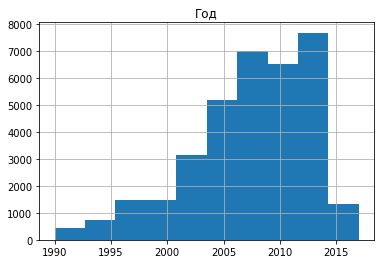

In [64]:
df.hist('Год')

array([[<AxesSubplot:title={'center':'Пробег'}>]], dtype=object)

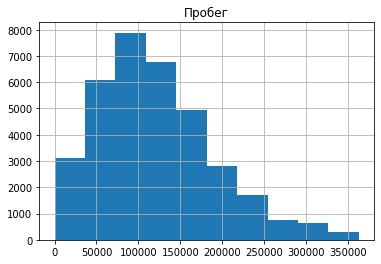

In [66]:
df.hist('Пробег')

array([[<AxesSubplot:title={'center':'Мощность'}>]], dtype=object)

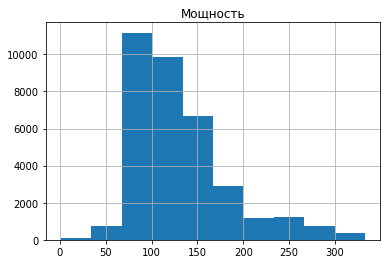

In [67]:
df.hist('Мощность')

array([[<AxesSubplot:title={'center':'Объем'}>]], dtype=object)

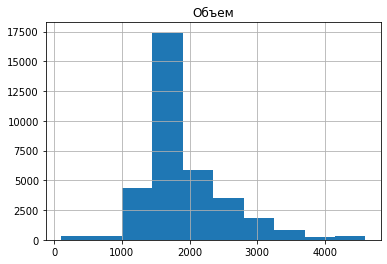

In [69]:
df.hist('Объем')

array([[<AxesSubplot:title={'center':'Цена'}>]], dtype=object)

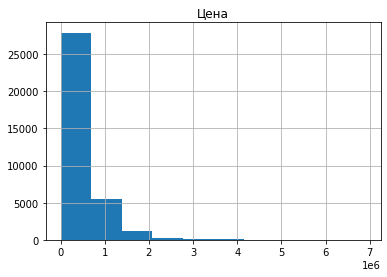

In [70]:
df.hist('Цена')

In [98]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler